In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data
## Wine dataset

In [2]:
class_name = 'Cultivars'

feature_cols = [
        'Alcohol',
        'Malic_acid',
        'Ash',
        'Alcalinity_of_ash',
        'Magnesium',
        'Total_phenols',
        'Flavanoids',
        'Nonflavanoid_phenols',
        'Proanthocyanins',
        'Color_intensity',
        'Hue',
        'OD280/OD315_of_diluted_wines',
        'Proline'
    ]

cols = feature_cols.copy()
cols.insert(0, class_name)

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                 header=None, names=cols)

df.head()

,Cultivars,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Cultivars                       178 non-null int64
Alcohol                         178 non-null float64
Malic_acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity_of_ash               178 non-null float64
Magnesium                       178 non-null int64
Total_phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid_phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color_intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315_of_diluted_wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# Missing data

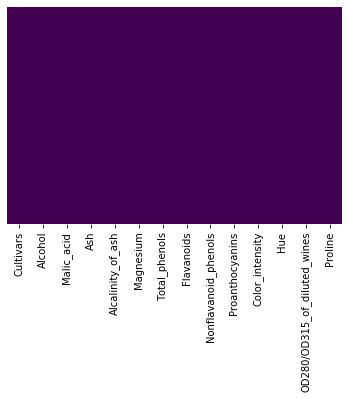

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Visualization

[Text(0, 0.5, 'Cultivars'),
 Text(0, 1.5, 'Alcohol'),
 Text(0, 2.5, 'Malic_acid'),
 Text(0, 3.5, 'Ash'),
 Text(0, 4.5, 'Alcalinity_of_ash'),
 Text(0, 5.5, 'Magnesium'),
 Text(0, 6.5, 'Total_phenols'),
 Text(0, 7.5, 'Flavanoids'),
 Text(0, 8.5, 'Nonflavanoid_phenols'),
 Text(0, 9.5, 'Proanthocyanins'),
 Text(0, 10.5, 'Color_intensity'),
 Text(0, 11.5, 'Hue'),
 Text(0, 12.5, 'OD280/OD315_of_diluted_wines'),
 Text(0, 13.5, 'Proline')]

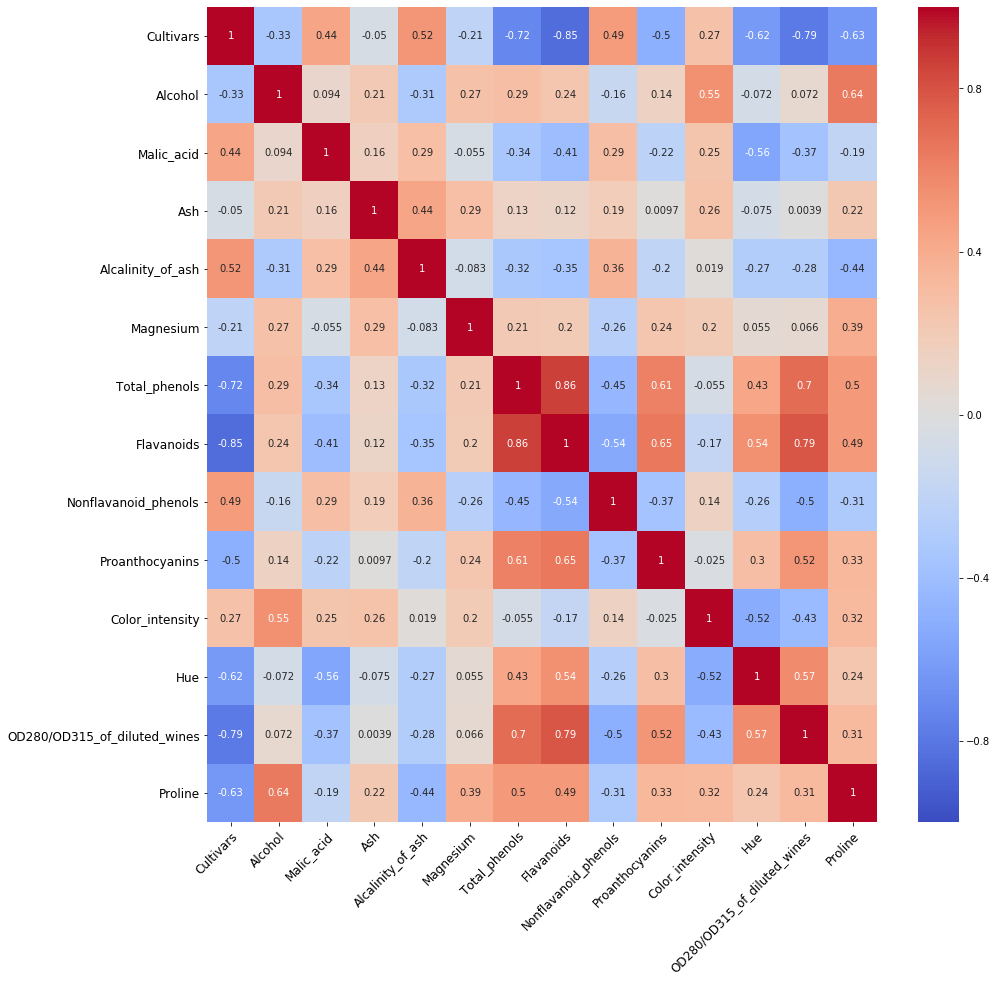

In [4]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(), 
            annot=True, 
            vmin=-1,
            cmap='coolwarm')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12, rotation_mode='anchor', ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

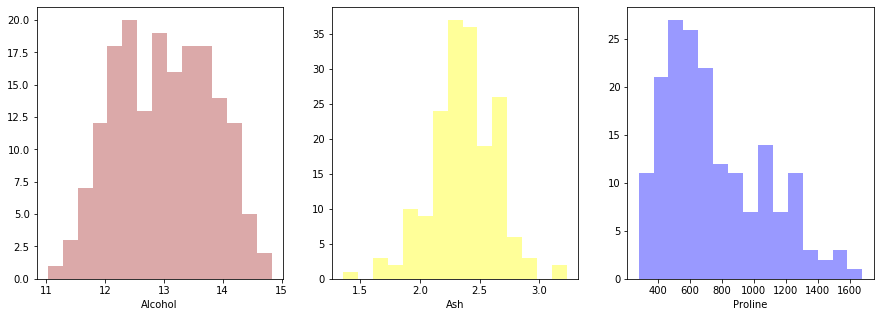

In [25]:
fig, axs = plt.subplots(figsize=(15,5), ncols=3)
sns.distplot(df['Alcohol'], kde=False, color='brown', bins=15, ax=axs[0])
sns.distplot(df['Ash'], kde=False, color='yellow', bins=15, ax=axs[1])
sns.distplot(df['Proline'], kde=False, color='blue', bins=15, ax=axs[2])

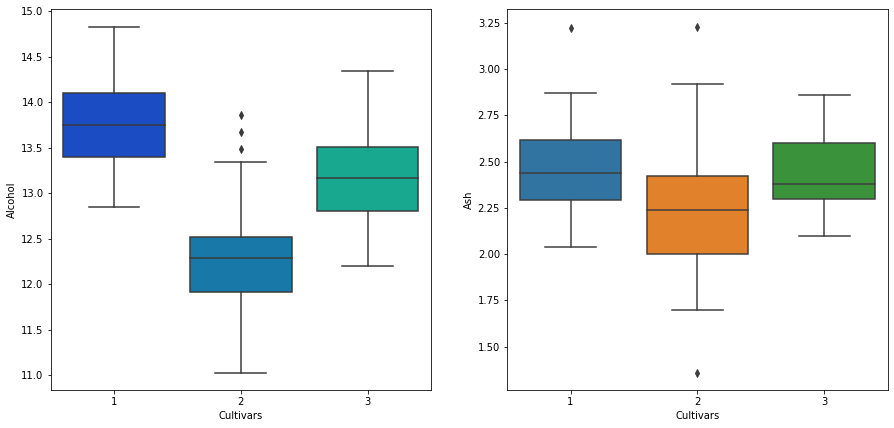

In [30]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=2)
sns.boxplot(x='Cultivars', y='Alcohol', data=df,palette='winter', ax=axs[0])
sns.boxplot(x='Cultivars', y='Ash', data=df, ax=axs[1])

# Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df.drop(class_name, axis=1))

scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])